using cuda
initializing...
skipping PCA because initial_dims is larger than input dimensionality
computing p-values...


  0%|          | 0/350 [00:00<?, ?it/s]

fitting...


  0%|          | 0/1000 [00:00<?, ?it/s]

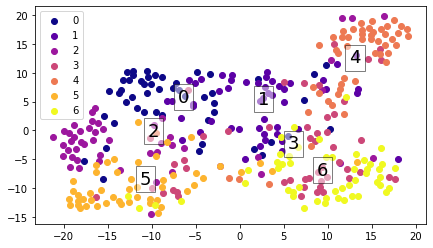

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms as transforms
import numpy as np
import itertools
import os
import time
import math
import argparse
import losses
import other
from datasets.RAF import RAF
from torch.autograd import Variable
from network.studentNet import CNN_RIS
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
from tsne_torch import TorchTSNE as TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def load_pretrained_model(model, pretrained_dict):
	model_dict = model.state_dict()
	# 1. filter out unnecessary keys
	pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
	# 2. overwrite entries in the existing state dict
	model_dict.update(pretrained_dict) 
	# 3. load the new state dict
	model.load_state_dict(model_dict)

NUM_CLASSES = 7
transforms_test_Normalize = transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(
    mean=[0.59003043, 0.4573948, 0.40749523], std=[0.2465465, 0.22635746, 0.22564183])
            (transforms.ToTensor()(crop)) for crop in crops]))
transform_test = transforms.Compose([
transforms.TenCrop(44),
transforms_test_Normalize,
])

PrivateTestset = RAF(split = 'PrivateTest', transform=transform_test, student_norm=None, teacher_norm=None)
PrivateTestloader = torch.utils.data.DataLoader(PrivateTestset, batch_size=32, shuffle=False, num_workers=1)
snet = CNN_RIS(num_classes=NUM_CLASSES).cuda()
snet.eval()

scheckpoint = torch.load('results/RAF_MultiTeacher_ENDD_KD3/Student_Test_model.t7')
load_pretrained_model(snet, scheckpoint['snet'])

for batch_idx, (img, target) in enumerate(PrivateTestloader):
    test_bs, ncrops, c, h, w = np.shape(img)
    img = img.view(-1, c, h, w)
    img = img.cuda()
    target = target.cuda()
    img, target = Variable(img), Variable(target)
    with torch.no_grad():
        rb1_s, rb2_s, rb3_s, mimic_s, out_s = snet(img)
    outputs_avg = out_s.view(test_bs, ncrops, -1).mean(1)
    if batch_idx == 0:
        data = outputs_avg
        label = target
    else:
        data = torch.cat((data,outputs_avg),0)
        label = torch.cat((label,target),0)
        
x_encode = TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=True).fit_transform(data)
cmap = plt.get_cmap('plasma',7) 
v_x = x_encode
v_y = label.cpu()

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
classes = [0,1,2,3,4,5,6]
for key in classes:
    ix = np.where(v_y==key)
    ax.scatter(v_x[ix][:,0], v_x[ix][:,1], color=cmap(key), label=key)
    ax.text(np.mean(v_x[ix][:,0]), np.mean(v_x[ix][:,1]), key, fontsize=18, bbox=dict(facecolor='white', alpha=0.5))
ax.legend()
if not os.path.isdir('picture/'):
    os.mkdir('picture/')
plt.savefig('picture/TSNE_ENDD.jpg', dpi=500)
plt.show()

using cuda
initializing...
skipping PCA because initial_dims is larger than input dimensionality
computing p-values...


  0%|          | 0/350 [00:00<?, ?it/s]

fitting...


  0%|          | 0/1000 [00:00<?, ?it/s]

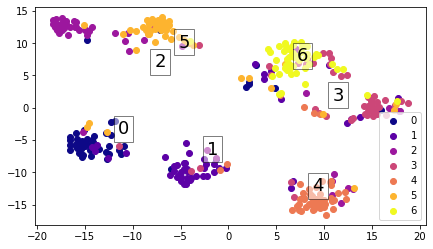

In [2]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms as transforms
import numpy as np
import itertools
import os
import time
import math
import argparse
import losses
import other
from datasets.RAF import RAF
from torch.autograd import Variable
from network.studentNet import CNN_RIS
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
from tsne_torch import TorchTSNE as TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def load_pretrained_model(model, pretrained_dict):
	model_dict = model.state_dict()
	# 1. filter out unnecessary keys
	pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
	# 2. overwrite entries in the existing state dict
	model_dict.update(pretrained_dict) 
	# 3. load the new state dict
	model.load_state_dict(model_dict)

NUM_CLASSES = 7
transforms_test_Normalize = transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(
    mean=[0.59003043, 0.4573948, 0.40749523], std=[0.2465465, 0.22635746, 0.22564183])
            (transforms.ToTensor()(crop)) for crop in crops]))
transform_test = transforms.Compose([
transforms.TenCrop(44),
transforms_test_Normalize,
])

PrivateTestset = RAF(split = 'PrivateTest', transform=transform_test, student_norm=None, teacher_norm=None)
PrivateTestloader = torch.utils.data.DataLoader(PrivateTestset, batch_size=32, shuffle=False, num_workers=1)
snet = CNN_RIS(num_classes=NUM_CLASSES).cuda()
snet.eval()

scheckpoint = torch.load('results/RAF_MultiTeacher_Few-Shot_KD3/Student_Test_model.t7')
load_pretrained_model(snet, scheckpoint['snet'])

for batch_idx, (img, target) in enumerate(PrivateTestloader):
    test_bs, ncrops, c, h, w = np.shape(img)
    img = img.view(-1, c, h, w)
    img = img.cuda()
    target = target.cuda()
    img, target = Variable(img), Variable(target)
    with torch.no_grad():
        rb1_s, rb2_s, rb3_s, mimic_s, out_s = snet(img)
    outputs_avg = out_s.view(test_bs, ncrops, -1).mean(1)
    if batch_idx == 0:
        data = outputs_avg
        label = target
    else:
        data = torch.cat((data,outputs_avg),0)
        label = torch.cat((label,target),0)
        
x_encode = TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=True).fit_transform(data)
cmap = plt.get_cmap('plasma',7) 
v_x = x_encode
v_y = label.cpu()

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
classes = [0,1,2,3,4,5,6]
for key in classes:
    ix = np.where(v_y==key)
    ax.scatter(v_x[ix][:,0], v_x[ix][:,1], color=cmap(key), label=key)
    ax.text(np.mean(v_x[ix][:,0]), np.mean(v_x[ix][:,1]), key, fontsize=18, bbox=dict(facecolor='white', alpha=0.5))
ax.legend()
if not os.path.isdir('picture/'):
    os.mkdir('picture/')
plt.savefig('picture/TSNE_FewShot.jpg', dpi=500)
plt.show()

using cuda
initializing...
skipping PCA because initial_dims is larger than input dimensionality
computing p-values...


  0%|          | 0/350 [00:00<?, ?it/s]

fitting...


  0%|          | 0/1000 [00:00<?, ?it/s]

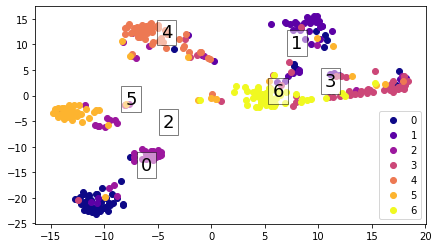

In [3]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms as transforms
import numpy as np
import itertools
import os
import time
import math
import argparse
import losses
import other
from datasets.RAF import RAF
from torch.autograd import Variable
from network.studentNet import CNN_RIS
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
from tsne_torch import TorchTSNE as TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def load_pretrained_model(model, pretrained_dict):
	model_dict = model.state_dict()
	# 1. filter out unnecessary keys
	pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
	# 2. overwrite entries in the existing state dict
	model_dict.update(pretrained_dict) 
	# 3. load the new state dict
	model.load_state_dict(model_dict)

NUM_CLASSES = 7
transforms_test_Normalize = transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(
    mean=[0.59003043, 0.4573948, 0.40749523], std=[0.2465465, 0.22635746, 0.22564183])
            (transforms.ToTensor()(crop)) for crop in crops]))
transform_test = transforms.Compose([
transforms.TenCrop(44),
transforms_test_Normalize,
])

PrivateTestset = RAF(split = 'PrivateTest', transform=transform_test, student_norm=None, teacher_norm=None)
PrivateTestloader = torch.utils.data.DataLoader(PrivateTestset, batch_size=32, shuffle=False, num_workers=1)
snet = CNN_RIS(num_classes=NUM_CLASSES).cuda()
snet.eval()

scheckpoint = torch.load('results/RAF_MultiTeacher_OurDiversity_0.0_0.0_KD2/Student_Test_model.t7')
load_pretrained_model(snet, scheckpoint['snet'])

for batch_idx, (img, target) in enumerate(PrivateTestloader):
    test_bs, ncrops, c, h, w = np.shape(img)
    img = img.view(-1, c, h, w)
    img = img.cuda()
    target = target.cuda()
    img, target = Variable(img), Variable(target)
    with torch.no_grad():
        rb1_s, rb2_s, rb3_s, mimic_s, out_s = snet(img)
    outputs_avg = out_s.view(test_bs, ncrops, -1).mean(1)
    if batch_idx == 0:
        data = outputs_avg
        label = target
    else:
        data = torch.cat((data,outputs_avg),0)
        label = torch.cat((label,target),0)
        
x_encode = TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=True).fit_transform(data)
cmap = plt.get_cmap('plasma',7) 
v_x = x_encode
v_y = label.cpu()

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
classes = [0,1,2,3,4,5,6]
for key in classes:
    ix = np.where(v_y==key)
    ax.scatter(v_x[ix][:,0], v_x[ix][:,1], color=cmap(key), label=key)
    ax.text(np.mean(v_x[ix][:,0]), np.mean(v_x[ix][:,1]), key, fontsize=18, bbox=dict(facecolor='white', alpha=0.5))
ax.legend()
if not os.path.isdir('picture/'):
    os.mkdir('picture/')
plt.savefig('picture/TSNE_0000.jpg', dpi=500)
plt.show()

using cuda
initializing...
skipping PCA because initial_dims is larger than input dimensionality
computing p-values...


  0%|          | 0/350 [00:00<?, ?it/s]

fitting...


  0%|          | 0/1000 [00:00<?, ?it/s]

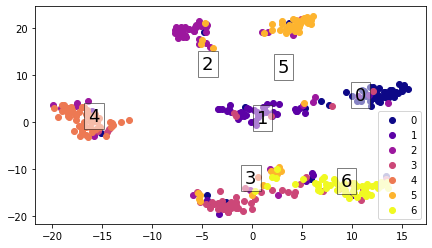

In [4]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms as transforms
import numpy as np
import itertools
import os
import time
import math
import argparse
import losses
import other
from datasets.RAF import RAF
from torch.autograd import Variable
from network.studentNet import CNN_RIS
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
from tsne_torch import TorchTSNE as TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

def load_pretrained_model(model, pretrained_dict):
	model_dict = model.state_dict()
	# 1. filter out unnecessary keys
	pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
	# 2. overwrite entries in the existing state dict
	model_dict.update(pretrained_dict) 
	# 3. load the new state dict
	model.load_state_dict(model_dict)

NUM_CLASSES = 7
transforms_test_Normalize = transforms.Lambda(lambda crops: torch.stack([transforms.Normalize(
    mean=[0.59003043, 0.4573948, 0.40749523], std=[0.2465465, 0.22635746, 0.22564183])
            (transforms.ToTensor()(crop)) for crop in crops]))
transform_test = transforms.Compose([
transforms.TenCrop(44),
transforms_test_Normalize,
])

PrivateTestset = RAF(split = 'PrivateTest', transform=transform_test, student_norm=None, teacher_norm=None)
PrivateTestloader = torch.utils.data.DataLoader(PrivateTestset, batch_size=32, shuffle=False, num_workers=1)
snet = CNN_RIS(num_classes=NUM_CLASSES).cuda()
snet.eval()

scheckpoint = torch.load('results/RAF_MultiTeacher_OurDiversity_0.8_9.0_KD3/Student_Test_model.t7')
load_pretrained_model(snet, scheckpoint['snet'])

for batch_idx, (img, target) in enumerate(PrivateTestloader):
    test_bs, ncrops, c, h, w = np.shape(img)
    img = img.view(-1, c, h, w)
    img = img.cuda()
    target = target.cuda()
    img, target = Variable(img), Variable(target)
    with torch.no_grad():
        rb1_s, rb2_s, rb3_s, mimic_s, out_s = snet(img)
    outputs_avg = out_s.view(test_bs, ncrops, -1).mean(1)
    if batch_idx == 0:
        data = outputs_avg
        label = target
    else:
        data = torch.cat((data,outputs_avg),0)
        label = torch.cat((label,target),0)
        
x_encode = TSNE(n_components=2, perplexity=30, n_iter=1000, verbose=True).fit_transform(data)
cmap = plt.get_cmap('plasma',7) 
v_x = x_encode
v_y = label.cpu()

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)
classes = [0,1,2,3,4,5,6]
for key in classes:
    ix = np.where(v_y==key)
    ax.scatter(v_x[ix][:,0], v_x[ix][:,1], color=cmap(key), label=key)
    ax.text(np.mean(v_x[ix][:,0]), np.mean(v_x[ix][:,1]), key, fontsize=18, bbox=dict(facecolor='white', alpha=0.5))
ax.legend()
if not os.path.isdir('picture/'):
    os.mkdir('picture/')
plt.savefig('picture/TSNE_0890.jpg', dpi=500)
plt.show()